In [208]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Unsupervised Learning and Extraction of Blinking Patterns

In [209]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import espbm

### Data Loading

In [210]:
ear_data = pd.read_csv("data/sample_ear_short.csv")
display(ear_data.head())

ear_l = ear_data["EAR_l"].values
ear_r = ear_data["EAR_r"].values

,Frame,EAR_r,EAR_l
0,0,0.286274,0.269362
1,1,0.291212,0.268412
2,2,0.291212,0.269362
3,3,0.297798,0.270195
4,4,0.291479,0.269233


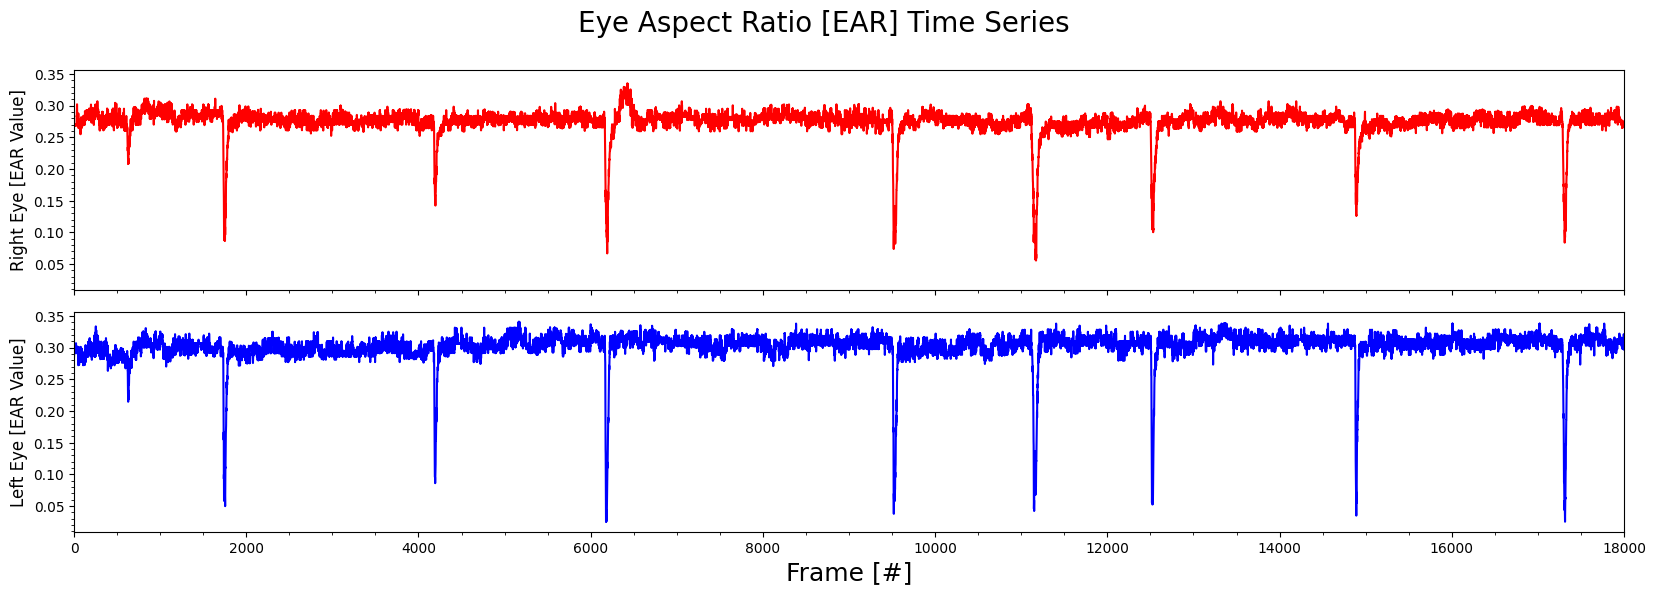

In [211]:
espbm.plot.ear_time_series(ear_l, ear_r)
plt.show()

----

(6.3, 13.6, 0.3, 0.25, 0.4)


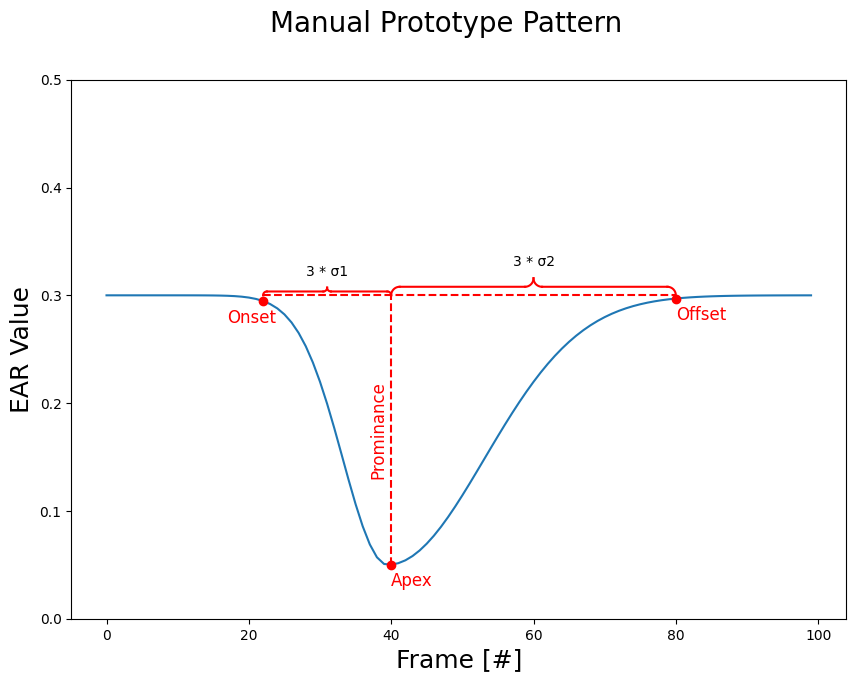

In [227]:
prototype, params = espbm.manual.define_prototype(return_params=True)
print(params)
espbm.plot.manual_prototype(prototype=prototype, params=params)
plt.show()

In [ ]:
matches_l = espbm.match.find_prototype(ear_l, prototype, max_prototype_distance=3.0)
matches_r = espbm.match.find_prototype(ear_r, prototype, max_prototype_distance=3.0)


(13.897760837553776, 19.999963336880807, 0.26899477662295174, 0.19168712701619864, 0.45164471062332784)


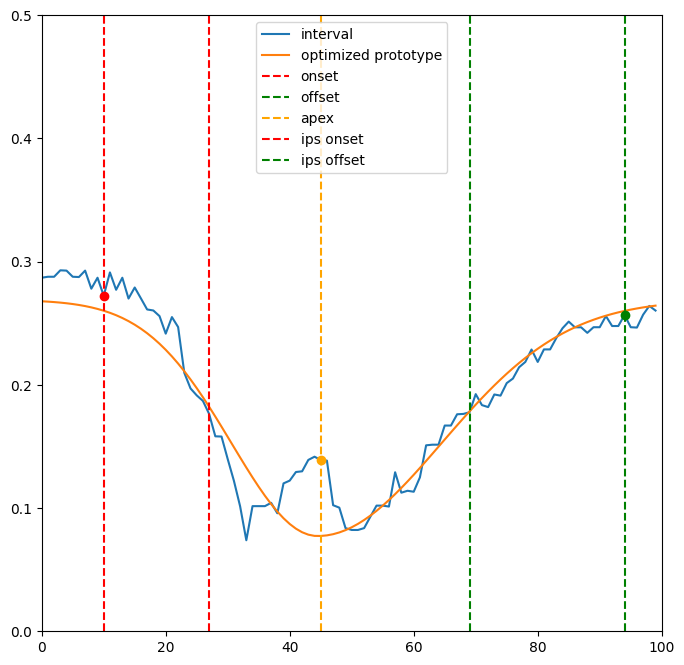

In [303]:
idx = 6
interval = ear_l[matches_l[idx][0] : matches_l[idx][1]]

o_proto, o_params = espbm.match.optim(interval, params)
print(o_params)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.set_xlim(0, len(interval))
ax.set_ylim(0, 0.5)
ax.plot(interval, label="interval")
ax.plot(o_proto, label="optimized prototype")

# plot the onset, offset and apex
sig1, sig2, baseline, prominance, apex_location = o_params
stats = espbm.match.interval_stats(interval, o_params)

ax.axvline(stats["onset_x"], color="red", linestyle="--", label="onset")
ax.axvline(stats["offset_x"], color="green", linestyle="--", label="offset")
ax.axvline(stats["apex_location"], color="orange", linestyle="--", label="apex")

# plot the onset, offset and apex
ax.plot(stats["onset_x"], stats["onset_y"], "ro")
ax.plot(stats["offset_x"], stats["offset_y"], "go")
ax.plot(stats["apex_location"], stats["apex_score"], "o", color="orange")

# ips
ax.axvline(stats["ips_left"], color="red", linestyle="--", label="ips onset")
ax.axvline(stats["ips_right"], color="green", linestyle="--", label="ips offset")

ax.legend()
plt.show()